# Geometric methods for machine learning

## Project 2 - Dynamic Time Warping

Thomas Gavoille, Guillaume Demonet

__References__ : _todo_

### Algorithm



In [13]:
from numba import jit

@jit
def dtw(x, y, cost, default=True):
    # Input : two sequences x and y, 
    #     resp. of size n and m
    n = x.shape[0]
    m = y.shape[0]
    
    # Computes the accumulated cost matrix
    D = np.zeros((n, m))
    D[:, 0] = np.cumsum(cost(x, y[0]))
    D[0, :] = np.cumsum(cost(x[0], y))
    
    for i in range(1,n):
        for j in range(1,m):
            D[i, j] = min(D[i-1, j-1],
                          D[i-1, j],
                          D[i, j-1])
            
    # Returns DTW(x,y) by default
    if default:
        return D[n-1,m-1]
    
    else:
        # Compute optimal warping path
        pass

In [11]:
@jit
def manhattan(x, y):
    return np.abs(x - y)

***
for timing comparison :

In [15]:
def nojit_dtw(x, y, cost, default=True):
    # Input : two sequences x and y, 
    #     resp. of size n and m
    n = x.shape[0]
    m = y.shape[0]
    
    # Computes the accumulated cost matrix
    D = np.zeros((n, m))
    D[:, 0] = np.cumsum(cost(x, y[0]))
    D[0, :] = np.cumsum(cost(x[0], y))
    
    for i in range(1,n):
        for j in range(1,m):
            D[i, j] = min(D[i-1, j-1],
                          D[i-1, j],
                          D[i, j-1])
            
    # Returns DTW(x,y) by default
    if default:
        return D[n-1,m-1]
    
    else:
        # Compute optimal warping path
        pass
    
def nojit_manhattan(x, y):
    return np.abs(x - y)

### Data acquisition

We select the following datasets from the UCR archive :

+ todo

In [3]:
import numpy as np

In [7]:
train = np.genfromtxt("50words/50words_TRAIN",
                      delimiter=',')

test = np.genfromtxt("50words/50words_TEST",
                     delimiter=',')

### Pair-wise distance matrix

Simple speed benchmark to validate Numba is effective :

In [30]:
%timeit dtw(train[0,1:], train[1,1:], cost = manhattan)

10000 loops, best of 3: 196 µs per loop


In [29]:
%timeit dtw(train[0,1:], train[1,1:], cost = nojit_manhattan)

1000 loops, best of 3: 199 µs per loop


In [28]:
%timeit nojit_dtw(train[0,1:], train[1,1:], cost = manhattan)

10 loops, best of 3: 44.7 ms per loop


In [27]:
%timeit nojit_dtw(train[0,1:], train[1,1:], cost = nojit_manhattan)

10 loops, best of 3: 52.6 ms per loop


We now compute all pair-wise distances :

In [32]:
@jit
def pw_dist(data, cost=manhattan):
    
    N = data.shape[0]
    D = np.zeros((N,N))
    
    for i in range(N):
        for j in range(N):
            D[i,j] = dtw(data[i], data[j], cost)
            
    return D

In [38]:
%%time
D = pw_dist(train[:,1:])

CPU times: user 39.7 s, sys: 8 ms, total: 39.7 s
Wall time: 39.7 s


In [55]:
# time theoretically needed 
# to compute it without numba
t = 39.7*52.6/0.2
print("{:.0f}h {:.0f}m".format(t//(60**2), 
                              (t//60)%60))

2h 54m


### Visualization

Using _t-SNE_ :

In [56]:
from sklearn import manifold

In [58]:
tsne = manifold.TSNE(init='pca', random_state=0)

In [59]:
import matplotlib.pyplot as plt

In [63]:
viz = tsne.fit_transform(D, train[:,0])

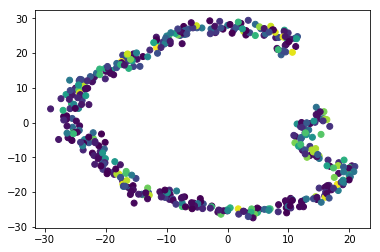

In [65]:
plt.scatter(viz[:,0], viz[:,1], c=train[:,0])
plt.show()